In [157]:
#imports
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [158]:
#Importing the cleaned dataset
dataset_name = 'Data.csv'
df = pd.read_csv(dataset_name)

In [159]:
df.head()

,RecordID,Date,FY,Item Description,Item Category,Cost,Cost Center Level 5,Cost Center Level 4,Management Level,Machine,Count,Time
0,507,2022-07-05 09:08:00,FY23,DVI/VGA Adapter (USB),Cables & Adapters,36.29,Advisory,Deals,Senior Manager,London Office 2 Vending Machine Level 0 L,1,09:08:00
1,608,2022-07-05 10:50:00,FY23,DVI/VGA Adapter (USB),Cables & Adapters,36.29,Advisory,Deals,Manager,London Office 2 Vending Machine Level 0 R,1,10:50:00
2,1400,2022-07-07 14:05:00,FY23,DVI/VGA Adapter (USB),Cables & Adapters,36.29,Advisory,Deals,Senior Manager,Birmingham Vending Machine Level 5,1,14:05:00
3,1510,2022-07-07 18:07:00,FY23,DVI/VGA Adapter (USB),Cables & Adapters,36.29,Assurance,Audit,Manager,London Office 2 Vending Machine Level 3,1,18:07:00
4,2148,2022-07-12 15:38:00,FY23,DVI/VGA Adapter (USB),Cables & Adapters,36.29,Advisory,Deals,Senior Associate,London Office 2 Vending Machine Level 0 R,1,15:38:00


In [160]:
def days_passed(date):
    days_gap = []
    days = []
    index = []

    #checking how many days have passed since the first day
    for i in range(len(date)):

        #Transforming the data
        date[i] = date[i].to_pydatetime()
        
        days_gap.append(date.iloc[i] - date.iloc[0])
        days.append(days_gap[i].days)
        
    return days

In [161]:
def count_amount(counting):

    num_arr = []
    count_arr = []

    # Counting occurrences of each number
    grouped = Counter(counting)

    # Printing the grouped numbers
    for num, count in grouped.items():
        num_arr.append(num)
        count_arr.append(count)

    return num_arr , count_arr

In [162]:
def df_to_variable(date_df):
    #Data cleaning for datetime
    date_df = pd.to_datetime(date_df)
    sort_date = date_df.sort_values() 
    sort_date = sort_date.reset_index(drop=True)
    return sort_date

In [163]:
def calculate_section_averages(arr, section_size):
    output_arr = []
    for i in range(0, len(arr), section_size):
        section = arr[i:i+section_size]
        section_average = sum(section) / len(section)
        output_arr.append(section_average)
    return output_arr


#Need to get the mean amounnt of purchases made in each Month , Week, and season

1. Get a count of the amount of purchases made for each of those periods

In [164]:
sort_full_days = df_to_variable(df['Date'])
days = days_passed(sort_full_days)

#This indexes the days therefore i know which index each day belongs to
indexed_values = [[i, value] for i, value in enumerate(days, start=1)]

In [165]:
# Define the list of values you want to check against.
month_count = [(32.7*1), (32.7*2), (32.7*3), (32.7*4), (32.7*5),  (32.7*6), (32.7*7), (32.7*8), (32.7*9), (32.7*10) , (32.7*11)]
zero_month_count = [0 , (32.7*1), (32.7*2), (32.7*3), (32.7*4), (32.7*5),  (32.7*6), (32.7*7), (32.7*8), (32.7*9), (32.7*10) , (32.7*11)]

In [166]:
#Getting the indexes of when those days are multiples of 30
for i, (x, y) in enumerate(indexed_values):
    if y % 30 == 0:
        print(indexed_values[i])

[1, 0]
[2, 0]
[3, 0]
[4, 0]
[5, 0]
[6, 0]
[7, 0]
[8, 0]
[9, 0]
[10, 0]
[11, 0]
[12, 0]
[13, 0]
[14, 0]
[15, 0]
[16, 0]
[17, 0]
[18, 0]
[19, 0]
[20, 0]
[21, 0]
[22, 0]
[23, 0]
[24, 0]
[25, 0]
[26, 0]
[27, 0]
[28, 0]
[29, 0]
[30, 0]
[31, 0]
[32, 0]
[33, 0]
[34, 0]
[35, 0]
[36, 0]
[37, 0]
[38, 0]
[39, 0]
[40, 0]
[41, 0]
[42, 0]
[43, 0]
[44, 0]
[45, 0]
[46, 0]
[47, 0]
[48, 0]
[49, 0]
[50, 0]
[51, 0]
[52, 0]
[53, 0]
[54, 0]
[55, 0]
[56, 0]
[57, 0]
[58, 0]
[59, 0]
[60, 0]
[61, 0]
[62, 0]
[63, 0]
[64, 0]
[65, 0]
[66, 0]
[67, 0]
[68, 0]
[69, 0]
[70, 0]
[71, 0]
[72, 0]
[73, 0]
[74, 0]
[75, 0]
[76, 0]
[77, 0]
[78, 0]
[79, 0]
[80, 0]
[81, 0]
[82, 0]
[83, 0]
[84, 0]
[85, 0]
[86, 0]
[87, 0]
[88, 0]
[89, 0]
[90, 0]
[91, 0]
[92, 0]
[93, 0]
[94, 0]
[95, 0]
[96, 0]
[97, 0]
[98, 0]
[99, 0]
[100, 0]
[101, 0]
[102, 0]
[5681, 30]
[5682, 30]
[5683, 30]
[11011, 60]
[11012, 60]
[11013, 60]
[11014, 60]
[11015, 60]
[11016, 60]
[11017, 60]
[11018, 60]
[11019, 60]
[11020, 60]
[11021, 60]
[11022, 60]
[11023, 60]
[

In [167]:
# Create a DataFrame from the reshaped array with default column names
amount_of_items_brought_per_day = pd.DataFrame(indexed_values, columns=['Column1', 'Column2'])

# Rename the columns
amount_of_items_brought_per_day = amount_of_items_brought_per_day.rename(columns={'Column1': 'Item_Number', 'Column2': 'Day'})

In [168]:
#This is where i manually went through the data looking for jumps in the data as there would be where the next multpile of 30 is 
row_separation = [5681 , 11011 , 17473 , 24921 , 32243 , 37912, 44455, 52167  , 60097 , 67889 , 76861 , 84650]

In [169]:
rows_searched = []

#This gets theamount of items that has been brought since each index
for i in range(1 , len(row_separation)):
    rows_searched.append(row_separation[i] - row_separation[i-1])

In [170]:
len(month_count)

11

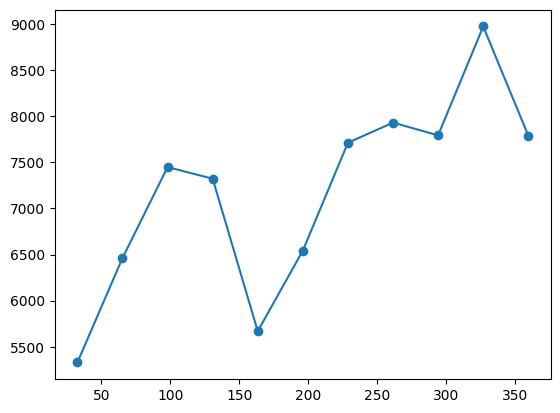

In [171]:
# plotting the linear graph
plt.scatter(month_count , rows_searched)
plt.plot(month_count , rows_searched)

2. Create a line of best fit to see a much clearer pattern and i cans tart working on error bars

In [172]:
#Data Cleaning 
arr_day_count = np.array(month_count)
arr_day_count = arr_day_count.reshape(-1 , 1)
arr_day_count

array([[ 32.7],
       [ 65.4],
       [ 98.1],
       [130.8],
       [163.5],
       [196.2],
       [228.9],
       [261.6],
       [294.3],
       [327. ],
       [359.7]])

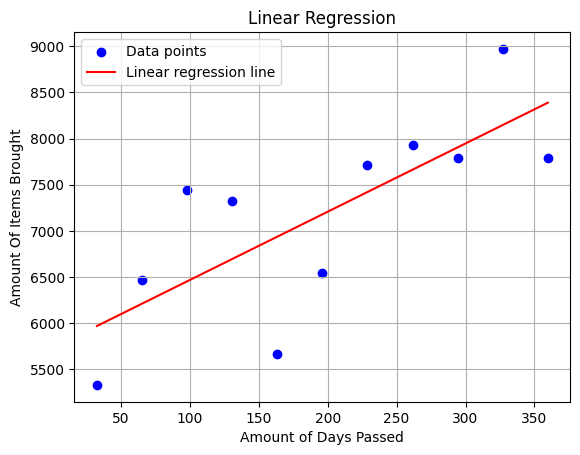

In [173]:
# Create linear regression model
model1 = LinearRegression()

# Fit the model
model1.fit(arr_day_count, rows_searched)

# Make predictions
predictions = model1.predict(arr_day_count)

# Plotting the data points and the linear regression line
plt.scatter(month_count, rows_searched, color='blue', label='Data points')
plt.plot(month_count, predictions, color='red', label='Linear regression line')
plt.xlabel('Amount of Days Passed')
plt.ylabel('Amount Of Items Brought')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


In [174]:
print(model1.predict([[265]]))

[7688.27684181]


Next i have a general idea of the data i can start to explore the amount of products brought per: LVL 5 , LVL 6 , Management Level, Location , Time

In [175]:
# Extracting three selected columns from the DataFrame
Items_Category_Data = df[['Item Category', 'Date', 'Count']]

# Convert the 'Date' column to datetime format
Items_Category_Data['Date'] = pd.to_datetime(Items_Category_Data['Date'])

# Sort the DataFrame by the 'Date' column
sorted_Items_Category_df = Items_Category_Data.sort_values(by='Date')

# Resetting the index
sorted_Items_Category_df = sorted_Items_Category_df.reset_index()

# Suppose 'Column' is the column you want to filter on
sorted_Items_Category_df = sorted_Items_Category_df[sorted_Items_Category_df['Count'] == 1]

print(sorted_Items_Category_df)


       index              Item Category                Date  Count
0      44246          Cables & Adapters 2022-07-01 01:08:00      1
1      44247          Cables & Adapters 2022-07-01 01:56:00      1
2      44248          Cables & Adapters 2022-07-01 06:50:00      1
3      44249          Cables & Adapters 2022-07-01 07:18:00      1
4      44250          Cables & Adapters 2022-07-01 07:52:00      1
...      ...                        ...                 ...    ...
86498  73017          Cables & Adapters 2023-06-30 19:43:00      1
86499  41559          Phone Accessories 2023-06-30 19:52:00      1
86500  39271          Cables & Adapters 2023-06-30 21:05:00      1
86501  83088  Power Adapters & Chargers 2023-06-30 22:22:00      1
86502  73018          Cables & Adapters 2023-06-30 22:23:00      1

[85572 rows x 4 columns]


C:\Users\Boomw\AppData\Local\Temp\ipykernel_3832\1124276018.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Items_Category_Data['Date'] = pd.to_datetime(Items_Category_Data['Date'])


In [176]:
sorted_Items_Category_df.head()

,index,Item Category,Date,Count
0,44246,Cables & Adapters,2022-07-01 01:08:00,1
1,44247,Cables & Adapters,2022-07-01 01:56:00,1
2,44248,Cables & Adapters,2022-07-01 06:50:00,1
3,44249,Cables & Adapters,2022-07-01 07:18:00,1
4,44250,Cables & Adapters,2022-07-01 07:52:00,1


In [177]:
# Grouping the DataFrame by the 'Category' column
grouped_data = sorted_Items_Category_df.groupby('Item Category')

In [178]:
for group_name, group_data in grouped_data:
    print(f"Group: {group_name}")

Group: Audio Devices
Group: Cables & Adapters
Group: Computer Accessories
Group: Phone Accessories
Group: Power Adapters & Chargers


In [179]:
#These are all the items organised in terms of time purchased separately
Audio_Devices = sorted_Items_Category_df.loc[grouped_data.groups['Audio Devices']]
Cables_and_Adapters = sorted_Items_Category_df.loc[grouped_data.groups['Cables & Adapters']]
Computer_Accessories = sorted_Items_Category_df.loc[grouped_data.groups['Computer Accessories']]
Phone_Accessories = sorted_Items_Category_df.loc[grouped_data.groups['Phone Accessories']]
Power_Adapters_Chargers = sorted_Items_Category_df.loc[grouped_data.groups['Power Adapters & Chargers']]

In [180]:
Audio_Devices.reset_index()

,level_0,index,Item Category,Date,Count
0,8,14229,Audio Devices,2022-07-01 08:25:00,1
1,21,1786,Audio Devices,2022-07-01 09:06:00,1
2,31,1787,Audio Devices,2022-07-01 10:11:00,1
3,38,1788,Audio Devices,2022-07-01 11:02:00,1
4,40,1789,Audio Devices,2022-07-01 11:10:00,1
...,...,...,...,...,...
17224,86438,19097,Audio Devices,2023-06-30 15:04:00,1
17225,86441,14227,Audio Devices,2023-06-30 15:07:00,1
17226,86454,19098,Audio Devices,2023-06-30 15:59:00,1
17227,86469,14228,Audio Devices,2023-06-30 16:57:00,1


In [181]:
Audio_Devices['Date']

8       2022-07-01 08:25:00
21      2022-07-01 09:06:00
31      2022-07-01 10:11:00
38      2022-07-01 11:02:00
40      2022-07-01 11:10:00
                ...        
86438   2023-06-30 15:04:00
86441   2023-06-30 15:07:00
86454   2023-06-30 15:59:00
86469   2023-06-30 16:57:00
86495   2023-06-30 19:39:00
Name: Date, Length: 17229, dtype: datetime64[ns]

In [182]:
#For some reason i cant have to use a variable and cant pass in the actual data 
audio_days = df_to_variable(Audio_Devices['Date'])
Cables_and_Adapters_days = df_to_variable(Cables_and_Adapters['Date'])
Computer_Accessories_days = df_to_variable(Computer_Accessories['Date'])
Phone_Accessories_days = df_to_variable(Phone_Accessories['Date'])
Power_Adapters_Chargers_days = df_to_variable(Power_Adapters_Chargers['Date'])

In [183]:
#Trying to get the amount of days passed from each of the items in each categorypurchase dates
audio_days = days_passed(audio_days)
Cables_and_Adapters_days = days_passed(Cables_and_Adapters_days)
Computer_Accessories = days_passed(Computer_Accessories_days)
Phone_Accessories_days = days_passed(Phone_Accessories_days)
Power_Adapters_Chargers_days = days_passed(Power_Adapters_Chargers_days)

In [184]:
#Counting the amount of times an item was brought on each day
audio_days_num , audio_days_num_appearance = count_amount(audio_days)
cable_an_adapters_days_num , cable_an_adapters_num_appearance = count_amount(Cables_and_Adapters)
computer_acessories_days_num , computer_acessories_num_appearance = count_amount(Computer_Accessories)
phone_acessories_days_num , phone_acessories_num_appearance = count_amount(Phone_Accessories)
power_adapters_chargers_accessories_days_num , power_adapters_chargers_num_appearance = count_amount(Power_Adapters_Chargers)

Now i can plot all graphs for the amount brought with respect to the time 

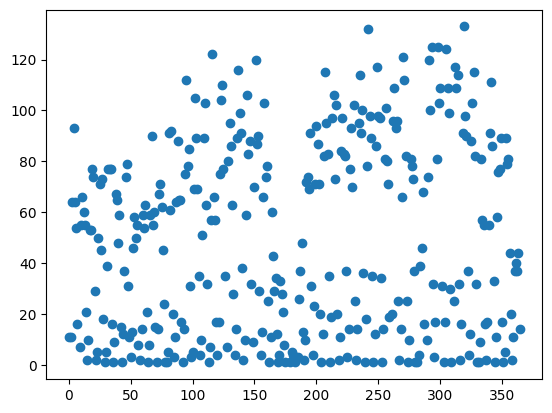

In [185]:
plt.scatter(audio_days_num , audio_days_num_appearance)

In [186]:
# Calculate section averages
output_arr = calculate_section_averages(audio_days_num_appearance, 30)

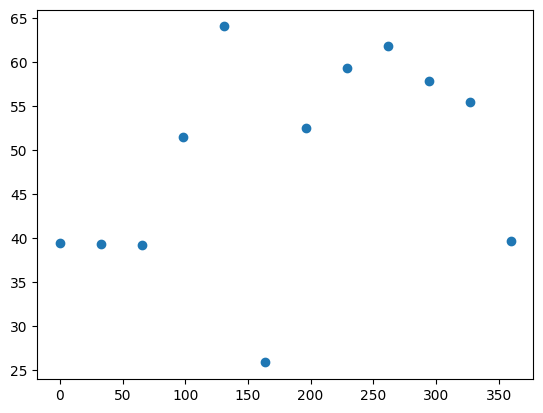

In [187]:
plt.scatter(zero_month_count , output_arr)

In [188]:
arr_zero_month_count = np.array(zero_month_count)
arr_zero_month_count = arr_zero_month_count.reshape(-1 , 1)
arr_zero_month_count

array([[  0. ],
       [ 32.7],
       [ 65.4],
       [ 98.1],
       [130.8],
       [163.5],
       [196.2],
       [228.9],
       [261.6],
       [294.3],
       [327. ],
       [359.7]])

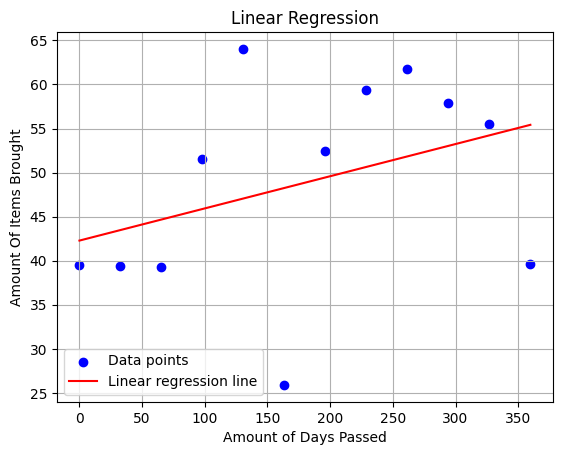

In [189]:
# Create linear regression model
model2 = LinearRegression()

# Fit the model
model2.fit(arr_zero_month_count, output_arr)

# Make predictions
predictions = model2.predict(arr_zero_month_count)

# Plotting the data points and the linear regression line
plt.scatter(arr_zero_month_count, output_arr, color='blue', label='Data points')
plt.plot(arr_zero_month_count, predictions, color='red', label='Linear regression line')
plt.xlabel('Amount of Days Passed')
plt.ylabel('Amount Of Items Brought')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


Now i have been able to show how the amount of items brought vary with respect to the amount of days passed

The next thing i need to do is analyse the amount of products brought per line of service first ill draw the bar charts for level 4 then draw bar charts for level 5

In [190]:
lvl4_LOS = df['Cost Center Level 4']
lvl4_LOS.head()

0    Deals
1    Deals
2    Deals
3    Audit
4    Deals
Name: Cost Center Level 4, dtype: object

In [191]:
#This cell returns how many timea a value appears in a series
cost_center_counts_lvl_4 = df['Cost Center Level 4'].value_counts()
cost_center_lvl_4= cost_center_counts_lvl_4.index

<BarContainer object of 31 artists>

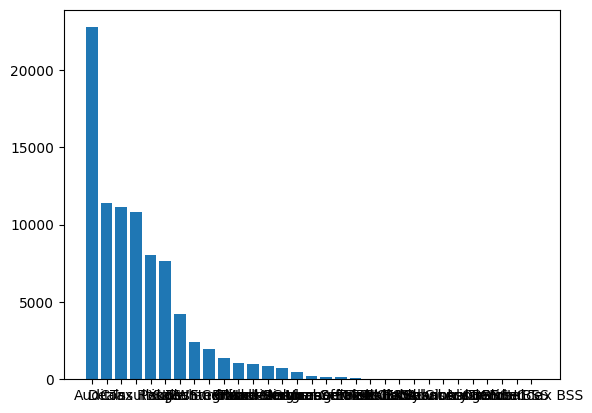

In [192]:
#This is a plot of which cost center buys the most product
plt.bar(cost_center_lvl_4 , cost_center_counts_lvl_4)

In [193]:
lvl5_LOS = df['Cost Center Level 5']
lvl5_LOS.head()

0     Advisory
1     Advisory
2     Advisory
3    Assurance
4     Advisory
Name: Cost Center Level 5, dtype: object

In [194]:
#This cell returns how many timea a value appears in a series
cost_center_counts_lvl_5 = df['Cost Center Level 5'].value_counts()
cost_center_lvl_5 = cost_center_counts_lvl_5.index

In [195]:
len(cost_center_counts_lvl_5)

5

<BarContainer object of 5 artists>

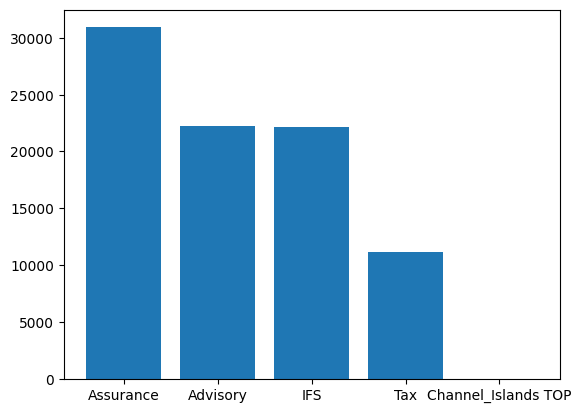

In [196]:
#This is a plot of which cost center buys the most product
plt.bar(cost_center_lvl_5 , cost_center_counts_lvl_5)

Now i have completed graphing the amount of stocks each cost center buys for lvl5 and lvl 4

I'm going to see which management level buys the most stocks overall.

In [197]:
management_level_count = df['Management Level'].value_counts()
management_level = management_level_count.index

<BarContainer object of 9 artists>

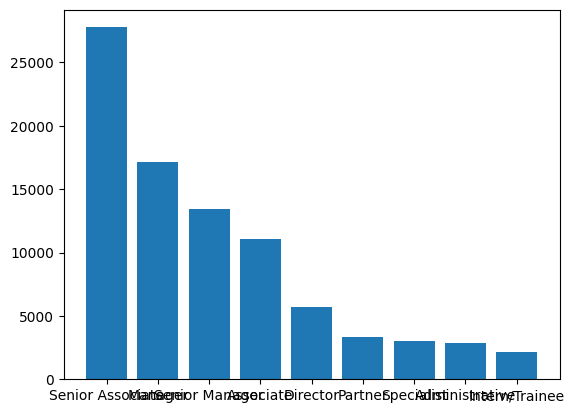

In [198]:
plt.bar(management_level , management_level_count)

next i am going to see which items each management level buys the most 

In [201]:
df_managament_item = df[['Management Level', 'Item Category']]
df_managament_item.sort_values(by='Management Level')
df_managament_item = df_managament_item.groupby(['Management Level', 'Item Category']).size().reset_index(name='Counts')
df_managament_item

,Management Level,Item Category,Counts
0,Administrative,Audio Devices,501
1,Administrative,Cables & Adapters,1094
2,Administrative,Computer Accessories,341
3,Administrative,Phone Accessories,337
4,Administrative,Power Adapters & Chargers,582
5,Associate,Audio Devices,2247
6,Associate,Cables & Adapters,4271
7,Associate,Computer Accessories,1539
8,Associate,Phone Accessories,769
9,Associate,Power Adapters & Chargers,2268


In [225]:
administrative_management = df_managament_item.iloc[:5]
Associate_management = df_managament_item.iloc[5:10]
Director_management = df_managament_item.iloc[10:15]
intern_management = df_managament_item.iloc[15:20]
manager_management = df_managament_item.iloc[20:25]
Partner_management = df_managament_item.iloc[25:30]
Senior_associate_management = df_managament_item.iloc[30:35]
Senior_Manager_management = df_managament_item.iloc[35:40]
Specialist_management = df_managament_item.iloc[40:]

,Management Level,Item Category,Counts
40,Specialist,Audio Devices,703
41,Specialist,Cables & Adapters,1079
42,Specialist,Computer Accessories,360
43,Specialist,Phone Accessories,322
44,Specialist,Power Adapters & Chargers,520


In [230]:
item_category_and_counts = administrative_management[['Item Category', 'Counts']]
print(item_category_and_counts['Counts'])

0     501
1    1094
2     341
3     337
4     582
Name: Counts, dtype: int64


In [231]:
administrative_management = administrative_management[['Item Category', 'Counts']]
Associate_management = Associate_management[['Item Category', 'Counts']]
Director_management = Director_management[['Item Category', 'Counts']]
intern_management = intern_management[['Item Category', 'Counts']]
manager_management = manager_management[['Item Category', 'Counts']]
Partner_management = Partner_management[['Item Category', 'Counts']]
Senior_associate_management = Senior_associate_management[['Item Category', 'Counts']]
Senior_Manager_management = Senior_Manager_management[['Item Category', 'Counts']]
Specialist_management = Specialist_management[['Item Category', 'Counts']]

<BarContainer object of 5 artists>

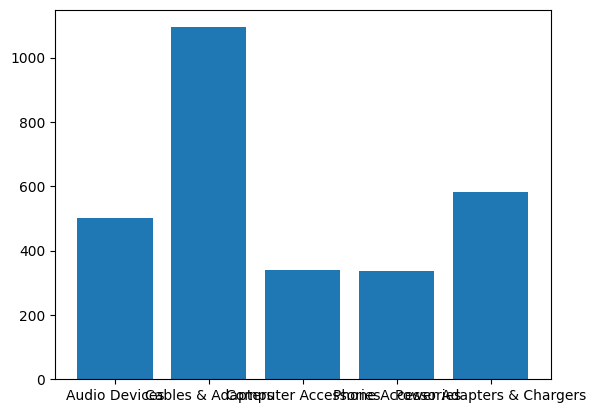

In [237]:
plt.bar(administrative_management['Item Category'] , administrative_management['Counts'])

The code above shows we are able to find which item was purched most by which managemet levels